In [2]:
import sys
sys.path.append('../src')

import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from data_loader import load_airbnb_data
from features import preprocess_data


In [4]:
df = load_airbnb_data("../data/raw/listings.csv")
df = df[df["price"] < 1000]
df["log_price"] = np.log1p(df["price"])

X_train, X_test, y_train, y_test, preprocessor = preprocess_data(df)


In [5]:
models = {
    "Ridge": Ridge(alpha=1.0),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}


In [6]:
results = []

for name, model in models.items():
    print(f"🔧 Training {name}...")
    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("regressor", model)
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3),
        "R²": round(r2, 4)
    })


🔧 Training Ridge...
🔧 Training RandomForest...
🔧 Training XGBoost...


In [7]:
results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
results_df


,Model,MAE,RMSE,R²
2,XGBoost,0.390,0.499,0.4427
1,RandomForest,0.392,0.503,0.4327
0,Ridge,0.482,0.607,0.1747


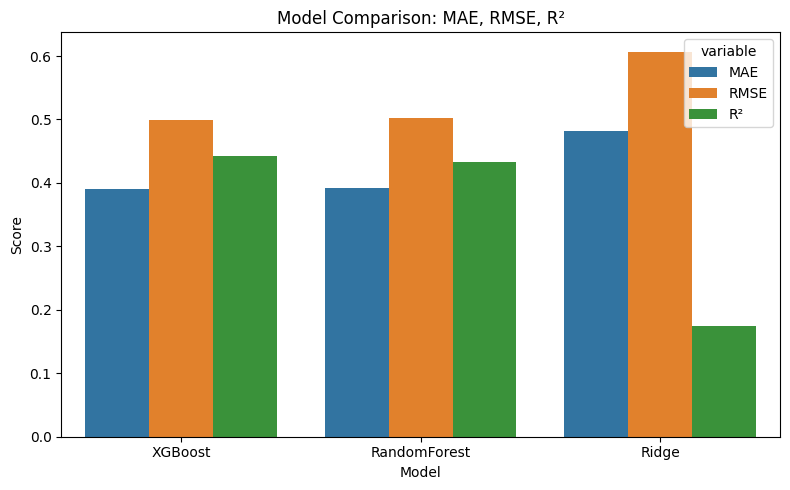

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(data=results_df.melt(id_vars="Model"), x="Model", y="value", hue="variable")
plt.title("Model Comparison: MAE, RMSE, R²")
plt.ylabel("Score")
plt.tight_layout()
plt.show()
